In [147]:
import pandas as pd
import numpy as np
import requests
import re
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [126]:
def import_draft_data_from_PFR_single_year(year, position):
    
    # Get URL for Query
    position_lowercase = position.lower()
    url = f'https://www.pro-football-reference.com/play-index/draft-finder.cgi?request=1&year_min={year}&year_max={year}&draft_slot_min=1&draft_slot_max=500&pick_type=overall&league_id=NFL&pos%5B%5D={position_lowercase}&conference=any&show=all&order_by=default&order_by_asc=Y'
    print(url)

    # Use the pandas html reader 
    result = pd.read_html(url)
    df = result[0]
    
    # Reset the column names
    super_column_names = [x[0] for x in df.columns]
    actual_column_names = [x[1] for x in df.columns]
    combined_column_names = [x[0]+'_'+x[1] if (x[0][:2] not in ['Un']) else x[1] for x in df.columns]
    df.columns = combined_column_names
    
    # Remove last column which has no info
    df.drop(columns=[df.columns[-1]], inplace=True)
    return df

In [115]:
def import_draft_data_from_PFR_multiple_years(year_list, position, sleep_time=0.):
    for year in year_list:
        draft_data_here = import_draft_data_from_PFR_single_year(year, position)
        try:
            draft_data = draft_data.append(draft_data_here)
            #print(draft_data.shape)
            #print('Appended!')
        except:
            draft_data = draft_data_here
            #print(draft_data.shape)
            #print('Created!')
        time.sleep(sleep_time) 
    draft_data.reset_index(inplace=True)
    return draft_data

In [133]:
# Where players were drafted, basic NFL stats, Career AV
# Source: pro-football-refernce
qb_draft_data = import_draft_data_from_PFR_multiple_years(range(2000,2019), 'QB', sleep_time=5.)

https://www.pro-football-reference.com/play-index/draft-finder.cgi?request=1&year_min=2000&year_max=2000&draft_slot_min=1&draft_slot_max=500&pick_type=overall&league_id=NFL&pos%5B%5D=qb&conference=any&show=all&order_by=default&order_by_asc=Y
(12, 26)
Created!
https://www.pro-football-reference.com/play-index/draft-finder.cgi?request=1&year_min=2001&year_max=2001&draft_slot_min=1&draft_slot_max=500&pick_type=overall&league_id=NFL&pos%5B%5D=qb&conference=any&show=all&order_by=default&order_by_asc=Y
(23, 26)
Appended!
https://www.pro-football-reference.com/play-index/draft-finder.cgi?request=1&year_min=2002&year_max=2002&draft_slot_min=1&draft_slot_max=500&pick_type=overall&league_id=NFL&pos%5B%5D=qb&conference=any&show=all&order_by=default&order_by_asc=Y
(38, 26)
Appended!
https://www.pro-football-reference.com/play-index/draft-finder.cgi?request=1&year_min=2003&year_max=2003&draft_slot_min=1&draft_slot_max=500&pick_type=overall&league_id=NFL&pos%5B%5D=qb&conference=any&show=all&order_by

In [134]:
qb_draft_data.columns

Index(['index', 'Rk', 'Year', 'Rnd', 'Pick', 'Player', 'Pos', 'DrAge', 'Tm',
       'From', 'To', 'Misc_AP1', 'Misc_PB', 'St', 'CarAV', 'Games_G',
       'Games_GS', 'Passing_QBrec', 'Passing_Cmp', 'Passing_Att',
       'Passing_Yds', 'Passing_TD', 'Passing_Int', 'Rushing_Att',
       'Rushing_Yds', 'Rushing_TD', 'College/Univ'],
      dtype='object')

In [136]:
qb_draft_data['Passing_Yds_per_Att'] = qb_draft_data['Passing_Yds'] / qb_draft_data['Passing_Att']

In [144]:
qb_draft_data['Passing_Yds_per_Game'] = qb_draft_data['Passing_Yds'] / qb_draft_data['Games_G']

In [165]:
qb_draft_data['CarAV/Start'] = qb_draft_data['CarAV'] / qb_draft_data['Games_GS']

In [170]:
qb_draft_data['CarAV/Game'] = qb_draft_data['CarAV'] / qb_draft_data['Games_G']

In [211]:
qb_draft_data[['Rk', 'Year','Pick','Player','Games_G','Passing_Yds','Passing_Yds_per_Att','Passing_Yds_per_Game','CarAV','CarAV/Game']].sort_values(by='Passing_Yds_per_Game', ascending=False)

,Rk,Year,Pick,Player,Games_G,Passing_Yds,Passing_Yds_per_Att,Passing_Yds_per_Game,CarAV,CarAV/Game
214,2,2017,10,Patrick Mahomes,17.0,5381.0,8.749593,316.529412,23.0,1.352941
13,2,2001,32,Drew Brees,264.0,74437.0,7.608811,281.958333,164.0,0.621212
155,1,2012,1,Andrew Luck,86.0,23671.0,7.194833,275.244186,71.0,0.825581
119,1,2009,1,Matthew Stafford,141.0,38526.0,7.127845,273.234043,91.0,0.645390
106,1,2008,3,Matt Ryan,174.0,46720.0,7.534269,268.505747,129.0,0.741379
223,1,2018,1,Baker Mayfield,14.0,3725.0,7.664609,266.071429,10.0,0.714286
162,8,2012,102,Kirk Cousins,78.0,20504.0,7.588453,262.871795,51.0,0.653846
6,7,2000,199,Tom Brady,269.0,70514.0,7.521493,262.133829,175.0,0.650558
191,1,2015,1,Jameis Winston,56.0,14628.0,7.610822,261.214286,41.0,0.732143
69,2,2005,24,Aaron Rodgers,165.0,42944.0,7.819374,260.266667,135.0,0.818182


<IPython.core.display.Javascript object>


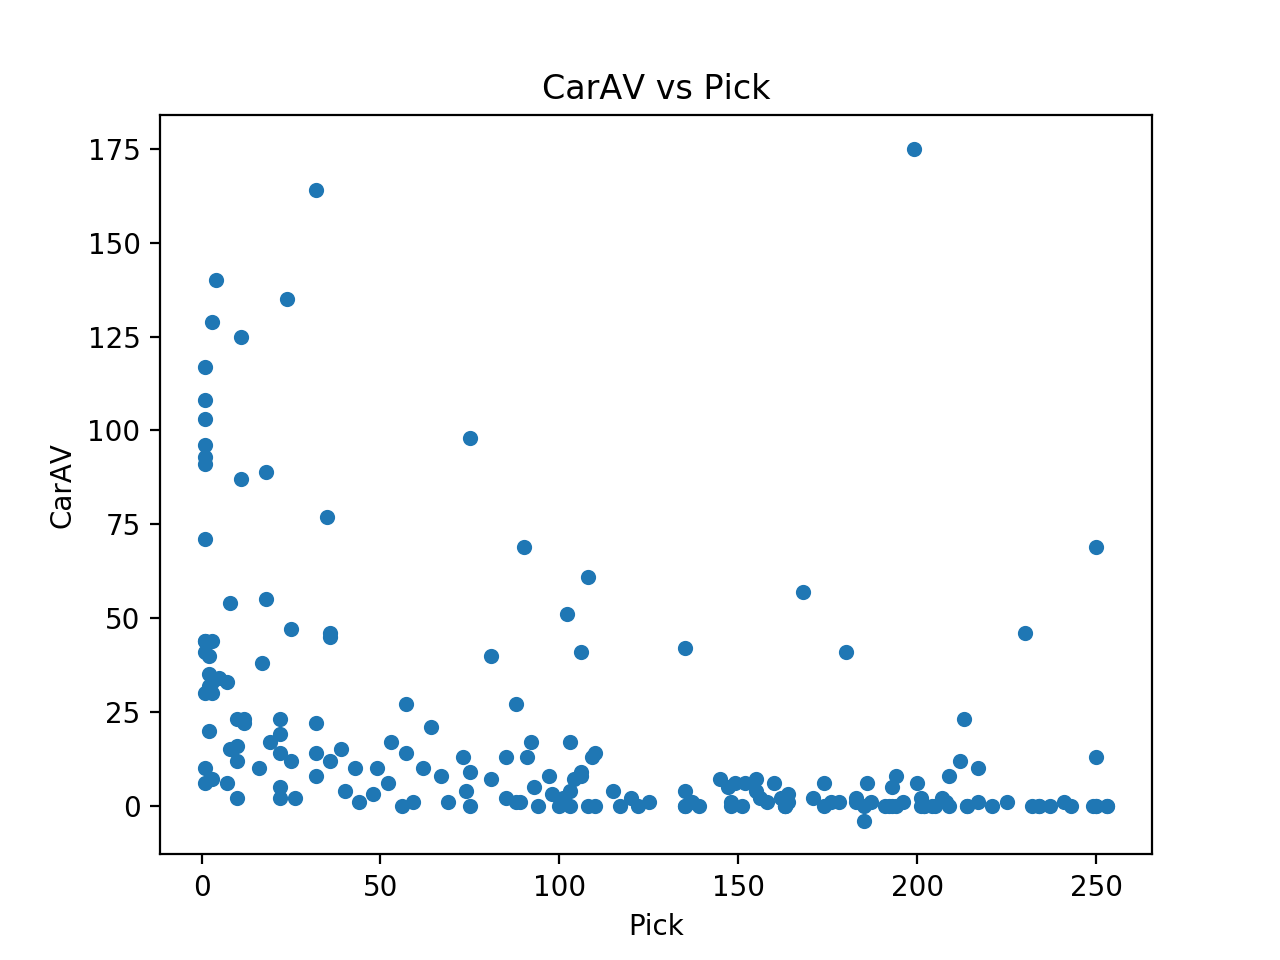

In [205]:
%matplotlib notebook
%matplotlib notebook
qb_draft_data.plot(kind='scatter',x='Pick', y='CarAV', title='CarAV vs Pick', logx=False)

<IPython.core.display.Javascript object>


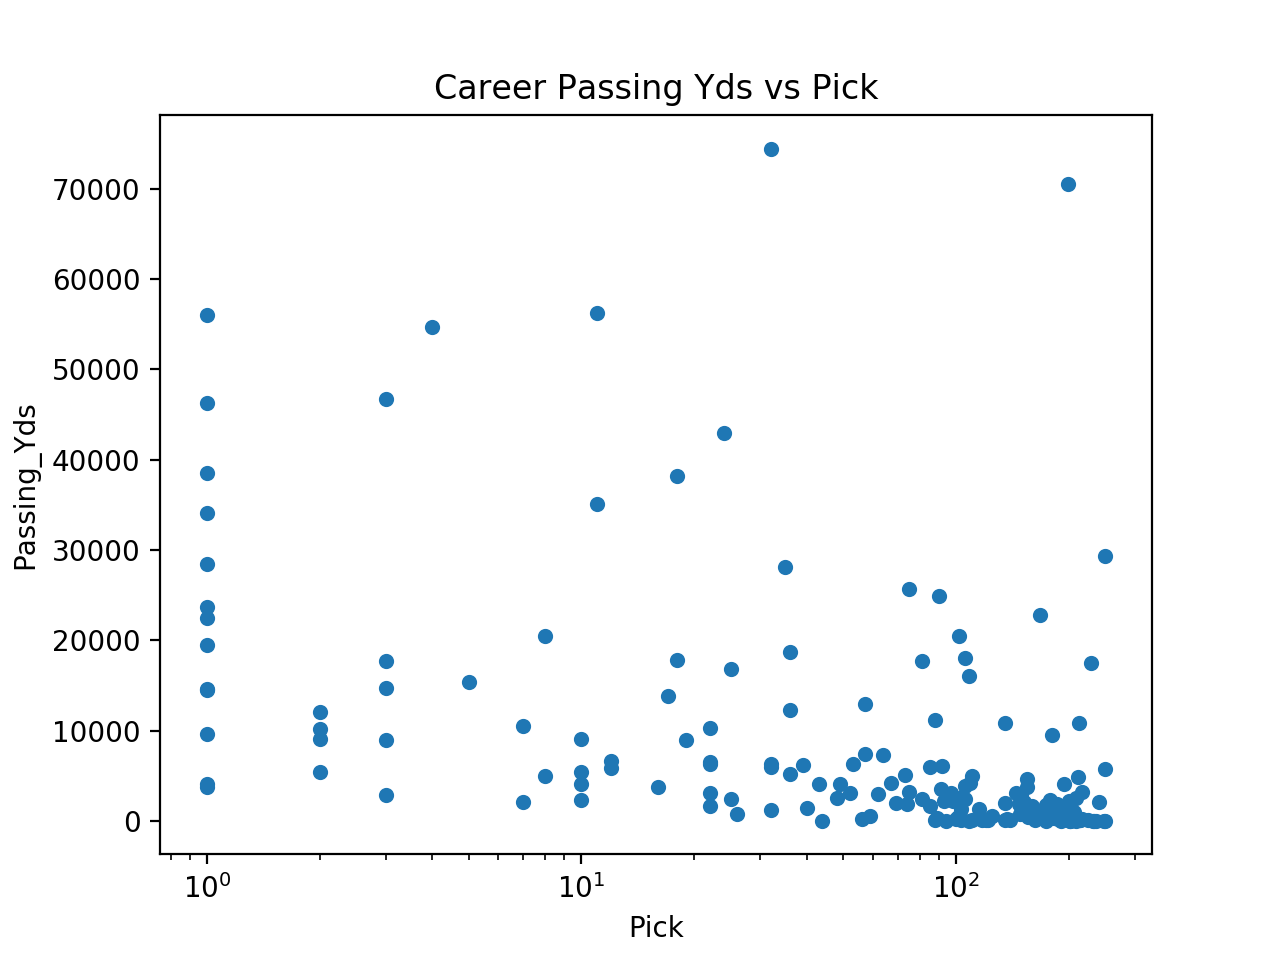

In [158]:
qb_draft_data.plot(kind='scatter',x='Pick', y='Passing_Yds', title='Career Passing Yds vs Pick', logx=True)

<IPython.core.display.Javascript object>


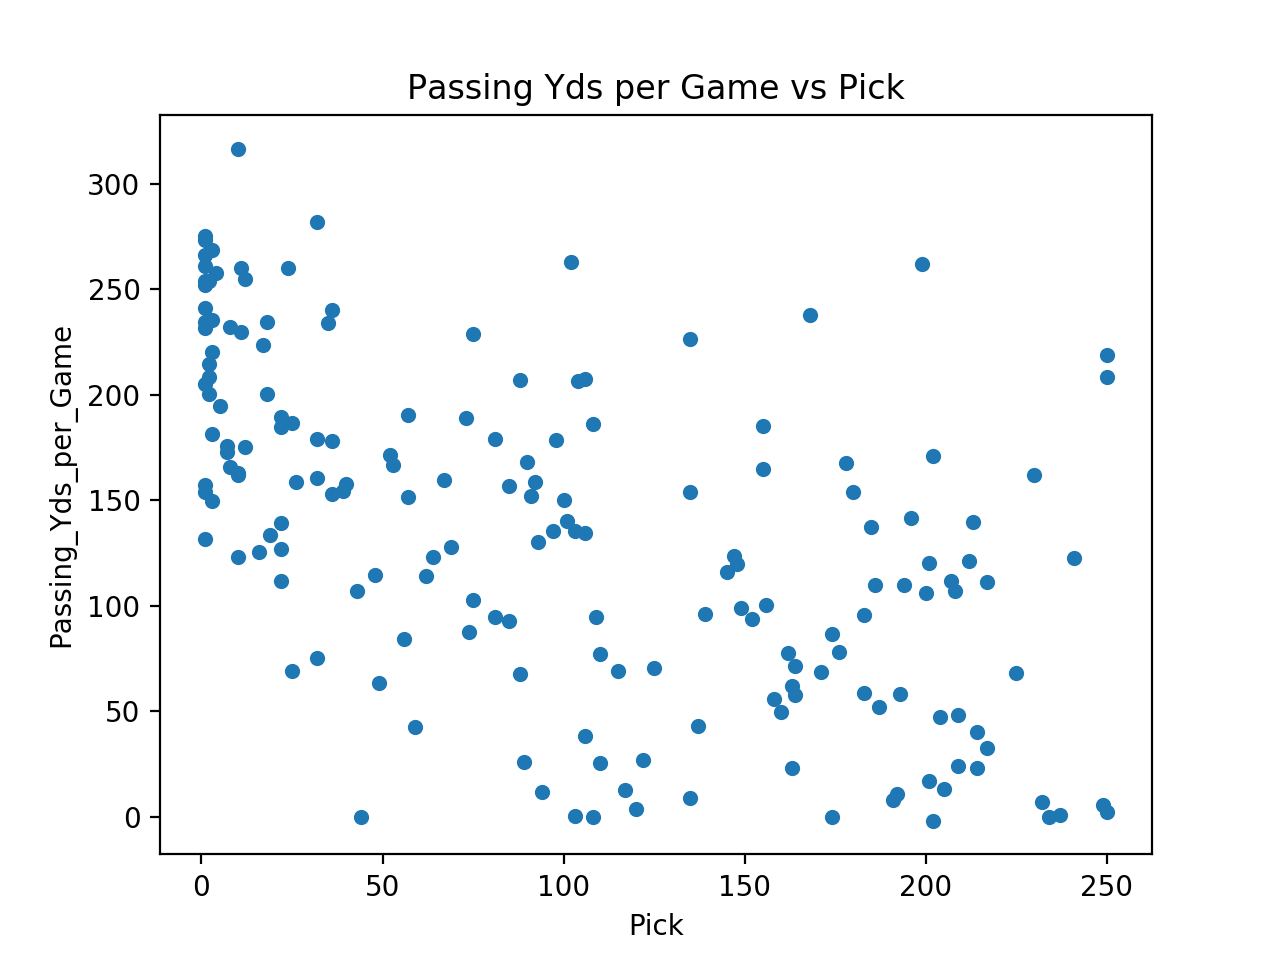

In [212]:
qb_draft_data.plot(kind='scatter',x='Pick', y='Passing_Yds_per_Game', title='Passing Yds per Game vs Pick')

<IPython.core.display.Javascript object>


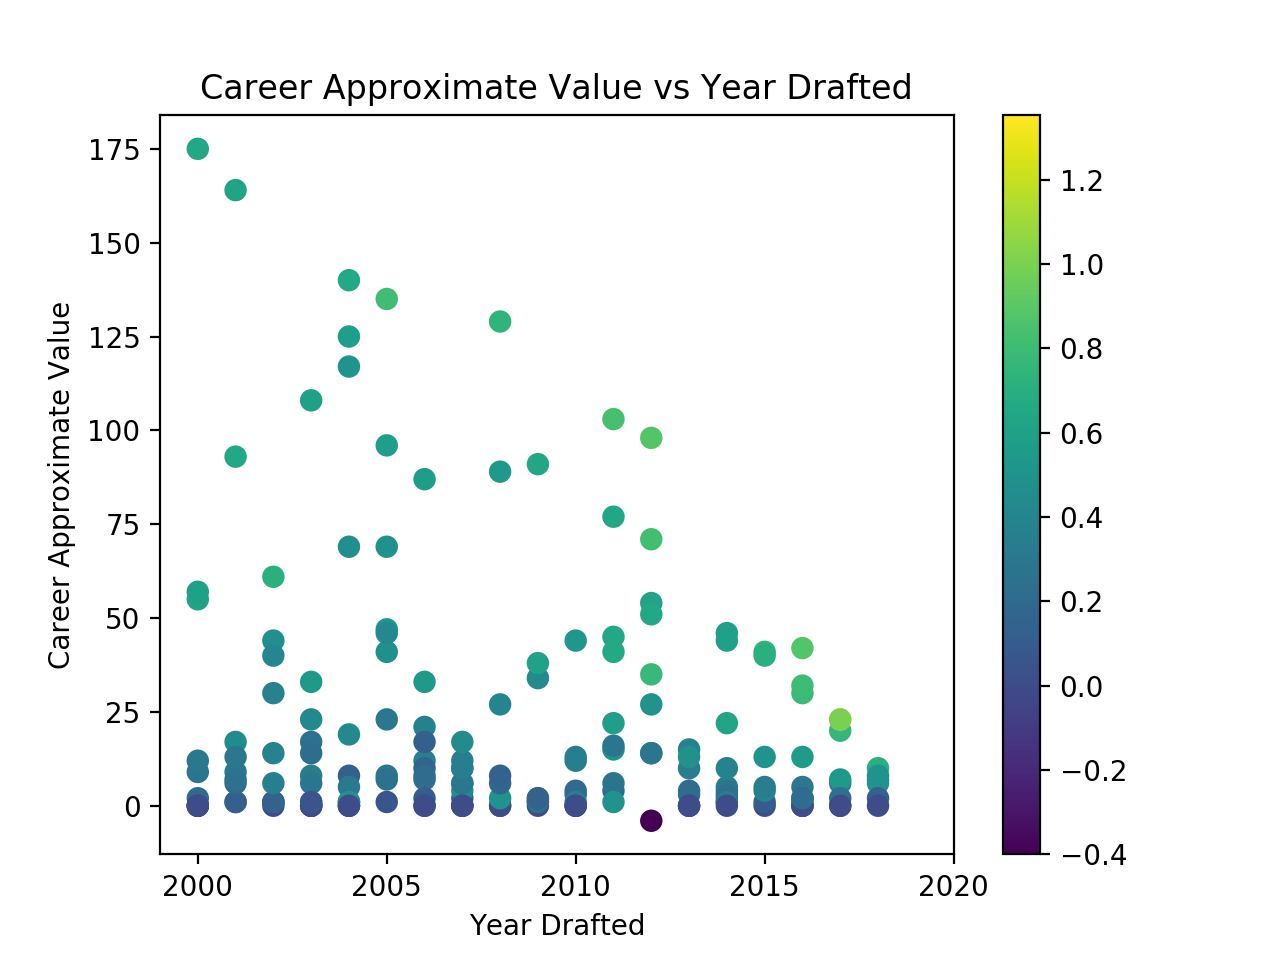

In [228]:
plt.figure()
plt.scatter(qb_draft_data['Year'].astype(int), qb_draft_data['CarAV'], c=qb_draft_data['CarAV/Game'], s=50)
plt.colorbar()
plt.title('Career Approximate Value vs Year Drafted')
plt.xlim([2000-1,2020])
plt.xticks(range(2000,2025,5))
plt.xlabel('Year Drafted')
plt.ylabel('Career Approximate Value')
plt.show()

<IPython.core.display.Javascript object>


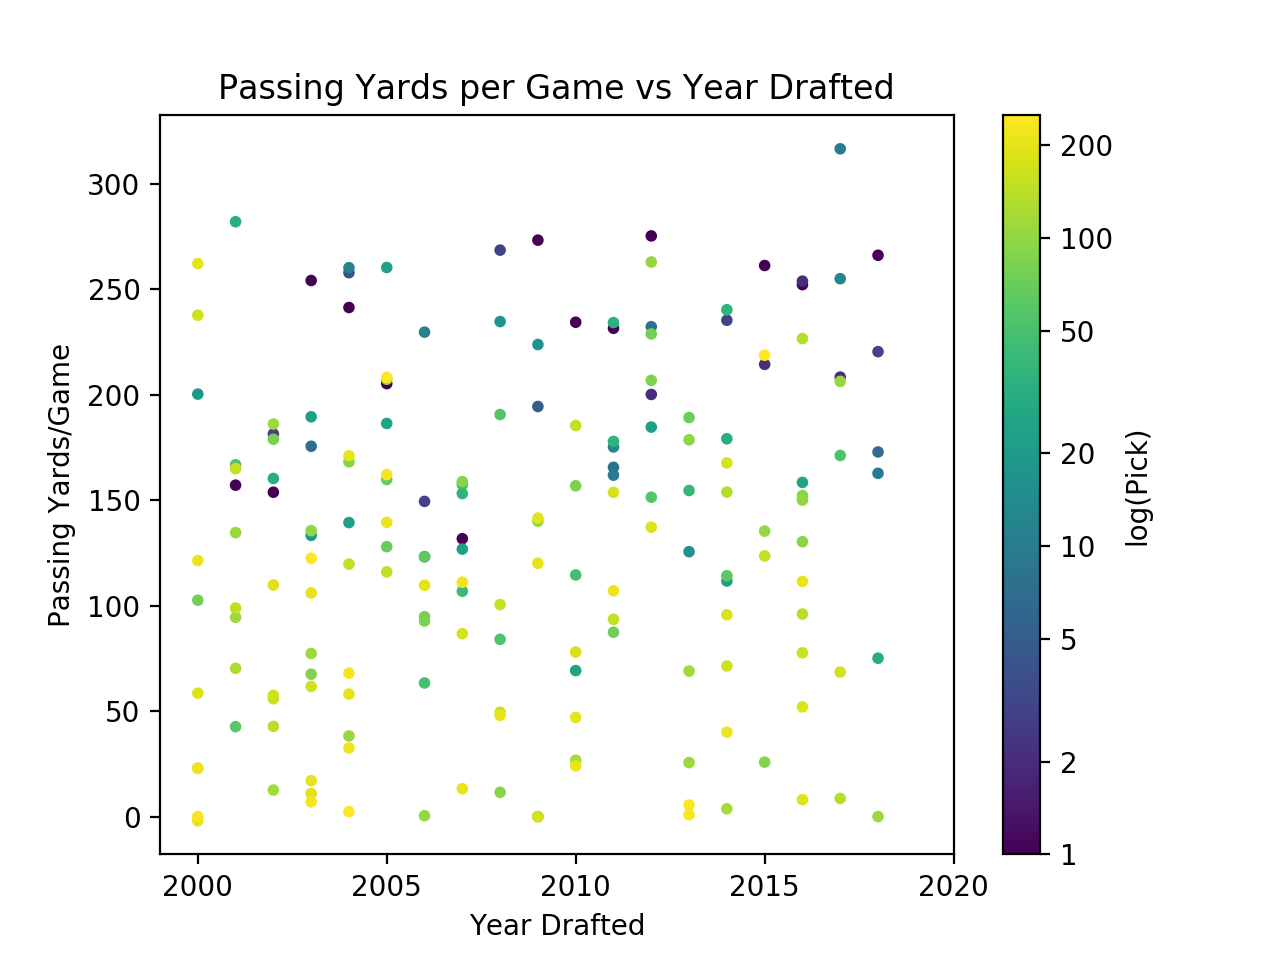

In [226]:
plt.figure()
plt.scatter(qb_draft_data['Year'], qb_draft_data['Passing_Yds_per_Game'], c=np.log(qb_draft_data['Pick']), s=10)
plt.title('Passing Yards per Game vs Year Drafted')
cbar_labels = np.array([1,2,5,10,20,50,100,200])
cbar = plt.colorbar(ticks=np.log(cbar_labels))
cbar.set_label('log(Pick)')
cbar.ax.set_yticklabels(cbar_labels) 
plt.xlim([2000-1,2020])
plt.xticks(range(2000,2025,5))
plt.xlabel('Year Drafted')
plt.ylabel('Passing Yards/Game')
plt.show()